# Data Driven Modeling
### (Theme of this semester: CODING AS LITERACY)
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />
### PhD seminar series at Chair for Computer Aided Architectural Design (CAAD), ETH Zurich

[Vahid Moosavi](https://vahidmoosavi.com)
<hr style="height:1px;border:none;color:stillblue;background-color:black;" />

<a></a>

# 13th Session 
<hr style="height:1px;border:none;color:stillblue;background-color:steelblue;" />
<span style="color:steelblue;font-size: 1em;">14 March 2017</span>


# Data Driven Modeling in Practice: Real Estate Market 

### Topics to be discussed 
* Main Elements of full stack development of data driven project.
* Today: Real Estate Project


* **Waht are the key questions in real estate market?**
* **Where and How to get the data?**
* **Data Wrangling: Big Data is always messy**
* **Machine Learning Part**
* **Deploying the model on a server**

![](images/RealEstate.png)


<hr style="height:1px;border:none;color:stillblue;background-color:steelblue;" />
<hr style="height:1px;border:none;color:stillblue;background-color:steelblue;" />
### <a></a>

# Data collection for this project
* web Crawling of Real Estate Search Portals: Homegate.ch, Immoscout.ch, ...
    * https://www.crummy.com/software/BeautifulSoup/
* Available open source data sets including demographics, transport data, education, environment,...
* Open Street Map: https://osmbuildings.org/?lat=40.71098&lon=-74.00276&zoom=15&rotation=0&tilt=30
* GeoAdmin.ch : https://map.geo.admin.ch/
* Mapzen: http://tangrams.github.io/gui-demo/
* Mapbox Studio: https://www.mapbox.com/mapbox-studio/
* Data Driven Styling: https://www.mapbox.com/blog/population-inspector/?utm_source=nov-newsletter&utm_medium=email&utm_content=blog-track-pop&utm_campaign=nov-newsletter
* Google Geocoding APIs: https://console.developers.google.com/apis/library?project=googcse20150904

# Data Cleaning

 ### Data resampling and synthetic data generation
     * We will talk about it in another session on resampling and bootstraping
 ### Geocoding of the data

In [19]:
import warnings
warnings.filterwarnings("ignore")
import datetime
import pandas as pd
# import pandas.io.data
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import sys
import sompylib.sompy as SOM# from pandas import Series, DataFrame

from ipywidgets import interact, HTML, FloatSlider

%matplotlib inline


# Basic analysis of the cleaned data

In [10]:
path ='./Data/Real_Estate_Market/All_Listing_latlng_2017_2_23.txt'
listing_with_latlong = pd.read_csv(path)
listing_with_latlong.head()

,ID,Address,ZIP,Date,Type,Rooms,Floor,Living space,Floor space,Room height,Volume,Year built,Last renovation,Net rent,Additional expenses,Rent,Available,lat,lng,URL
0,106322589.0,Reutlingerstrasse 10/14 5000 Aarau,5000.0,2017-02-22,Apartment,2.0,1.,42.0,NaN,NaN,NaN,1983.0,NaN,930,160,1090.0,immediately,47.382578,8.051152,NaN
1,106250068.0,Rue de Monthoux 40 1201 Genève,1200.0,2017-02-22,Apartment,2.0,2.,NaN,NaN,NaN,NaN,NaN,NaN,1350,120,1470.0,immediately,46.210998,6.147436,NaN
2,106330306.0,Rue de Berne 29bis 1201 Genève,1200.0,2017-02-22,Apartment,3.0,4.,NaN,NaN,NaN,NaN,NaN,NaN,1500,NaN,1500.0,immediately,46.210495,6.145934,NaN
3,106181244.0,Rue de Monthoux 40 1201 Genève,1200.0,2017-02-22,Apartment,2.0,2.,NaN,NaN,NaN,NaN,NaN,NaN,1400,120,1520.0,immediately,46.210998,6.147436,NaN
4,105931148.0,Rue de Bâle 16 1201 Genève,1200.0,2017-02-22,Apartment,3.0,4.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1650.0,immediately,46.212934,6.149217,NaN


In [11]:

print listing_with_latlong.shape 
#Kinds of features we are interested in
cols = ['ID', 'ZIP', 'Date','Type','Rooms','Floor',
       'Living space','Floor space','Room height','Volume',
       'Year built','Last renovation','Net rent','Additional expenses',
       'Rent','lng','lat']
#         'Available','lng','lat','Public transport','Shopping','Kindergarten','Primary school','Secondary school','Motorway']
listing = listing_with_latlong[cols]

#Types of listing we are interested in
Types = ['Apartment','Attic compartment','Attic flat','Bachelor flat','Bifamiliar house','Cellar compartment','Chalet',
       'Duplex','Farm house','Granny flat','Home','Roof flat','Row house','Rustic house','Single house','Studio','Terrace flat',
       'Terrace house','Villa']
Types = ['Apartment']
id_type = []
for i in range(listing.shape[0]):
    if listing['Type'].values[i] in Types:
        id_type.append(i)
listing = listing.ix[id_type]

cols = ['Rent','ZIP',
        'Type',
        'Rooms','Year built','Last renovation',
       'Living space',
        'Floor',
       'lng','lat']
listing = listing[cols]


try:
    ind_by = listing['Floor']=='GF' 
    listing['Floor'].ix[ind_by] =0
    ind_by = listing['Floor']=='Underground' 
    listing['Floor'].ix[ind_by] =-1
except:
    print 'floor is not in the columns'

listing['Rent'] = listing['Rent'].values[:].astype(float) 

#Remove outliers based on a global statistics, calculated previously
# 
Supply_stat = listing.describe(percentiles=[.001,.01,.2,.5,.99,.995,.999])
for f in ['Rooms','Living space','Rent']:
    mx = Supply_stat[f].ix['99.9%']
    ind = listing[f]>mx
    listing[f].ix[ind]=mx
    mn = Supply_stat[f].ix['0.1%']
    ind = listing[f]<mn
    listing[f].ix[ind]=mn


#For Zurich
# listing.index = range(listing.shape[0])
# sel = [i for i in listing.index.values[:] if listing.ZIP.values[i] in Zurich_Zip.zip.values[:]]
# listing = listing.ix[sel]  

# eps = .2
# ind0 = listing['lat'].values[:]>(Zlatbound[1]+eps)
# ind1 = listing['lat'].values[:]<(Zlatbound[0]-eps)
# ind2 = listing['lng'].values[:]>(Zlngbound[1]+eps)
# ind3 = listing['lng'].values[:]<(Zlngbound[0]-eps)
# indremove = (ind0 + ind1 + ind2 + ind3)
# indkeep = [not i for i in indremove]
# print indremove.sum()
# listing = listing.ix[indkeep]

listing = listing[['Rent','ZIP','Rooms','Year built','Living space','Floor','lng','lat']]    
listing = listing.dropna()
listing.index = range(listing.shape[0])
print listing.shape


(158171, 20)
(50766, 8)


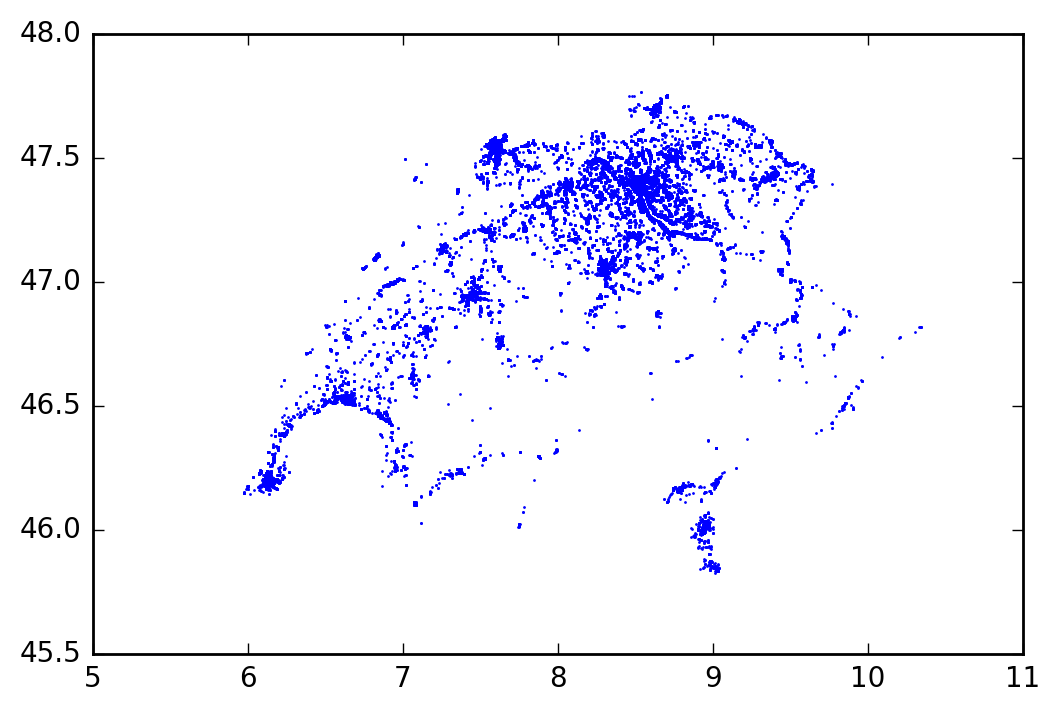

In [12]:
plt.plot(listing.lng,listing.lat,'.',markersize=1)

In [13]:
listing.head()

,Rent,ZIP,Rooms,Year built,Living space,Floor,lng,lat
0,1090.0,5000.0,2.0,1983.0,42.0,1.,8.051152,47.382578
1,1923.0,1200.0,4.0,1930.0,72.0,1.,6.150230,46.213396
2,2425.0,1200.0,4.0,1983.0,76.0,1.,6.148701,46.210094
3,2480.0,1200.0,4.0,1910.0,68.0,5.,6.148480,46.210668
4,1430.0,1200.0,2.0,1945.0,32.0,3.,6.147548,46.210081


In [14]:
Supply_stat

,Rent,ZIP,Rooms,Year built,Last renovation,Living space,lng,lat
count,130582.000000,132403.000000,130944.000000,59741.000000,23185.000000,112647.000000,132403.000000,132403.000000
mean,1916.145319,5528.768381,3.489651,1983.713781,2011.122967,86.835735,7.993818,47.091962
std,956.898994,2856.183542,1.134819,45.390784,15.048527,43.262236,0.907196,0.459413
min,200.000000,1000.000000,1.000000,1016.000000,1014.000000,11.000000,5.972127,45.821860
0.1%,457.905000,1000.000000,1.000000,1500.000000,1960.368000,15.000000,6.040631,45.837649
1%,700.000000,1000.000000,1.000000,1842.000000,1986.000000,25.000000,6.122570,46.000216
20%,1320.000000,1814.000000,2.500000,1963.000000,2008.000000,60.000000,7.061325,46.607187
50%,1730.000000,6000.000000,3.500000,1994.000000,2014.000000,83.000000,8.294367,47.285629
99%,5500.000000,9500.000000,6.500000,2017.000000,2017.000000,190.000000,9.566651,47.696539
99.5%,6570.950000,9545.000000,6.642500,2017.000000,2017.000000,216.000000,9.680681,47.706840


### Basic Analysis

In [15]:
def hist1d_Supply_query(Area,Min_Rooms,Min_Size,Max_Rent):
    Supply_Threshold=1
    Max_Size=500
    Max_Rooms=11
    Min_Rent=100
    q = Area

    fig = plt.figure(figsize=(12,3))
    font = {'size'   : 8}
    plt.rc('font', **font)
    ind_q_Supply = (listing['ZIP']==q)
    q_data_Supply = listing.ix[ind_q_Supply]
    
    
    import itertools
    import numpy as np    
    
    if Min_Rooms >= Max_Rooms:
            Max_Rooms = Min_Rooms
    if Min_Size>=Max_Size:
            Max_Size= Min_Size
    if Min_Rent>=Max_Rent:
            Max_Rent= Min_Rent
            
    def check_search(df):
        
        amn = df['Rooms']>=Min_Rooms
        amx = df['Rooms']<=Max_Rooms
        
        
        
        
        bmn = df['Living space']>=Min_Size
        bmx = df['Living space']<=Max_Size
        
        
        cmn = df['Rent']>=Min_Rent
        cmx = df['Rent']<=Max_Rent
        
        return amn&bmn&cmn&amx&bmx&cmx
    
    
    
    
    

        
    if q_data_Supply.shape[0]>=1:
    
        rooms = []
        sizes =[]
        prices = []
        print "**************************************************************"
        print 'Number of unique Supply Ads: {}.'.format(q_data_Supply.shape[0])
        
            
        ax = plt.subplot(1,3,1)
        plt.title('Supply: Room')
        
        rooms = q_data_Supply['Rooms'].dropna().values[:]
        room_bin = range(int(Supply_stat['Rooms'].ix['1%']),int(Supply_stat['Rooms'].ix['99.5%']+1))
        a = plt.hist(rooms,bins=room_bin,alpha=1,color='white',linewidth=.5,edgecolor='black',rwidth=1,normed=False)
        ax.yaxis.grid(True)
        
        ax = plt.subplot(1,3,2)
        plt.title('Supply: Size')
    
        mn = int(Supply_stat['Living space'].ix['1%'])
        mx = int(Supply_stat['Living space'].ix['99.5%'])
        R = mx-mn
            # stp = int(R/30)
        stp = 20
        size_bin = range(mn,mx+stp,stp)
        
        
        sizes = q_data_Supply['Living space'].dropna().values[:]
        
        a = plt.hist(sizes,bins=size_bin,alpha=1,color='white',linewidth=.5,edgecolor='black',normed=False)
        ax.yaxis.grid(True)
    
        ax = plt.subplot(1,3,3)
        plt.title('Supply: Price')
        
        mn = int(Supply_stat['Rent'].ix['1%'])
        mx = int(Supply_stat['Rent'].ix['99.5%'])
        R = mx-mn
        stp = 200
        price_bin = range(mn,mx+stp,stp)
        
        prices = q_data_Supply['Rent'].dropna().values[:]
        a = plt.hist(prices,bins=price_bin,alpha=1,color='white',linewidth=.5,edgecolor='black',normed=False)
    
        ax.yaxis.grid(True)
        plt.tight_layout()
        
        mn = int(Supply_stat['Rent'].ix['1%'])
        mx = int(Supply_stat['Rent'].ix['99.5%'])
        plt.xlim(mn,mx)
        plt.title('Relative Supply Distributions: Price')
        
        
    else:
        print "\n**************************************************************"
        print 'Not enough Supply this area with the zip code {}.'.format(Area)
        return
    
    
    q_data_Supply_bounded = q_data_Supply.ix[check_search(q_data_Supply)]
    
    if q_data_Supply_bounded.shape[0]>=1:
    
        rooms = []
        sizes =[]
        prices = []
        print "**************************************************************"
        print 'Number of unique Supply Ads based on your query: {}.'.format(q_data_Supply_bounded.shape[0])
        
            
        ax = plt.subplot(1,3,1)
        plt.title('No. of rooms')
        
        rooms = q_data_Supply_bounded['Rooms'].dropna().values[:]
        room_bin = range(int(Supply_stat['Rooms'].ix['1%']),int(Supply_stat['Rooms'].ix['99.5%']+1))
        a = plt.hist(rooms,bins=room_bin,alpha=1,color='red',linewidth=.5,edgecolor='black',rwidth=1,normed=False)
        ax.yaxis.grid(True)
        
        ax = plt.subplot(1,3,2)
        plt.title('Living space (m^2)')
    
        mn = int(Supply_stat['Living space'].ix['1%'])
        mx = int(Supply_stat['Living space'].ix['99.5%'])
        R = mx-mn
            # stp = int(R/30)
        stp = 20
        size_bin = range(mn,mx+stp,stp)
        
        
        sizes = q_data_Supply_bounded['Living space'].dropna().values[:]
        
        a = plt.hist(sizes,bins=size_bin,alpha=1,color='red',linewidth=.5,edgecolor='black',normed=False)
        ax.yaxis.grid(True)
    
        ax = plt.subplot(1,3,3)
        plt.title('Monthly rent')
        
        mn = int(Supply_stat['Rent'].ix['1%'])
        mx = int(Supply_stat['Rent'].ix['99.5%'])
        R = mx-mn
        stp = 200
        price_bin = range(mn,mx+stp,stp)
        
        prices = q_data_Supply_bounded['Rent'].dropna().values[:]
        a = plt.hist(prices,bins=price_bin,alpha=1,color='red',linewidth=.5,edgecolor='black',normed=False)
    
        ax.yaxis.grid(True)
        plt.tight_layout()

        
    else:
        print "\n**************************************************************"
        print 'Based on your query there are not enough Supply for this area with the zip code {}.'.format(Area)
        return

    

**************************************************************
Number of unique Supply Ads: 148.
**************************************************************
Number of unique Supply Ads based on your query: 41.


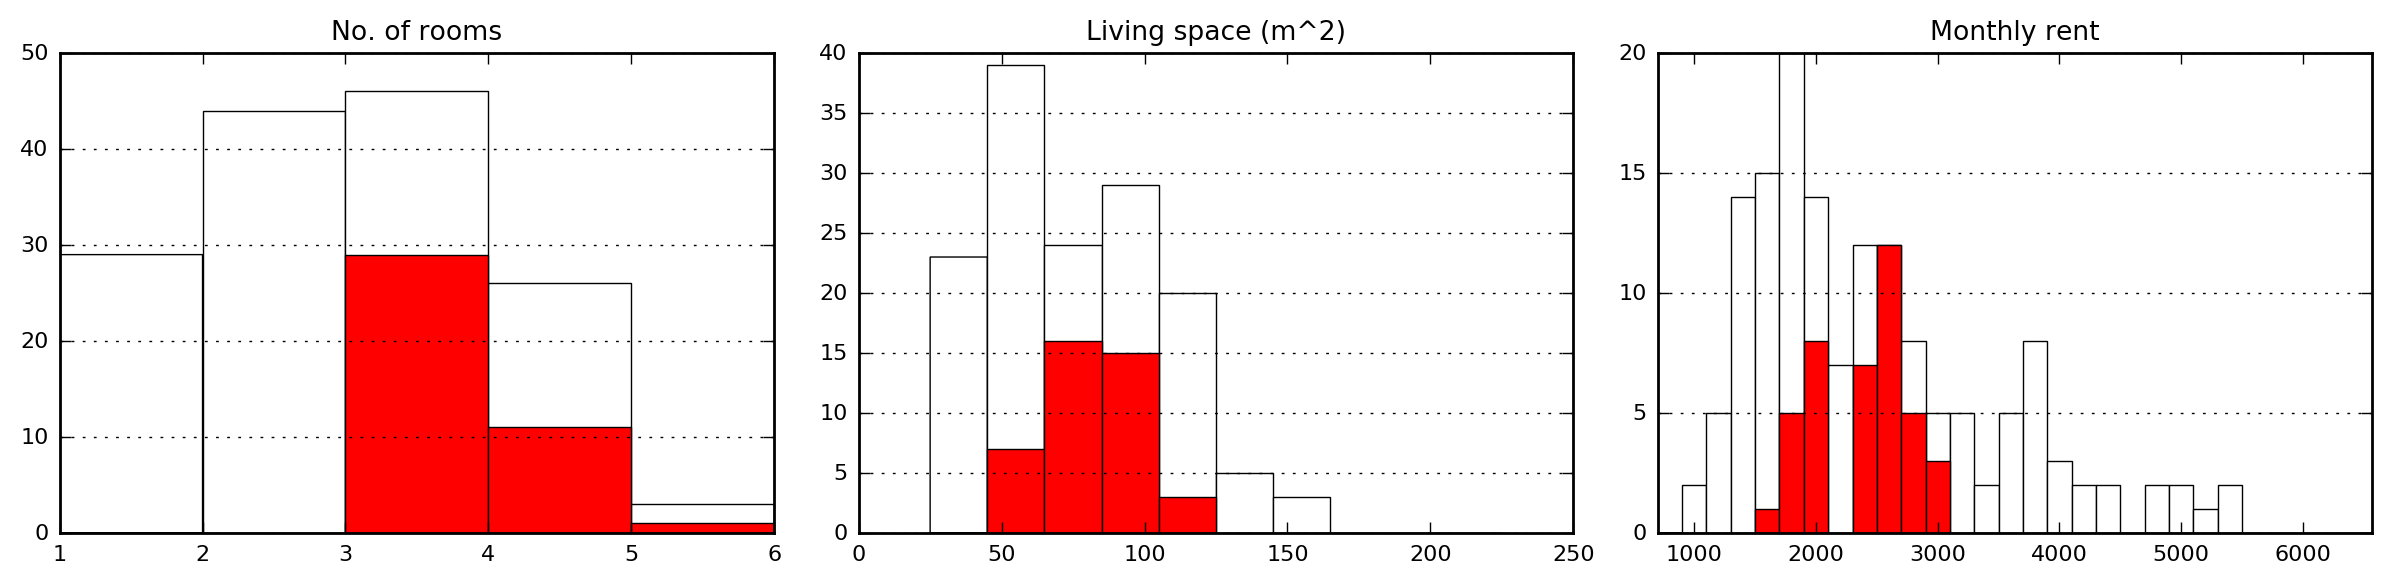

In [16]:
interact(hist1d_Supply_query,Area=(8001,8008,1),Min_Rooms=(1,6,1),Min_Size=(10,100,10),Max_Rent=(1000,6000,100));

In [17]:
def spatial_query_supply(Min_Rooms,Min_Size,Max_Rent,whattoplot='percentofcoverage'):
    
    Supply_Threshold=1
    Max_Size=500
    Max_Rooms=11
    Min_Rent=100

    
    cmapname="RdYlBu_r"
#     cmapname="B"
    import itertools
    import numpy as np    
    
    if Min_Rooms >= Max_Rooms:
            Max_Rooms = Min_Rooms
    if Min_Size>=Max_Size:
            Max_Size= Min_Size
    if Min_Rent>=Max_Rent:
            Max_Rent= Min_Rent
            
    def check_search(df):
        
        amn = df['Rooms'].values[:]>=Min_Rooms
        amx = df['Rooms'].values[:]<=Max_Rooms
        
        
        
        bmn = df['Living space'].values[:]>=Min_Size
        bmx = df['Living space'].values[:]<=Max_Size
        
        
        cmn = df['Rent'].values[:]>=Min_Rent
        cmx = df['Rent'].values[:]<=Max_Rent
        
        return (amn*bmn*cmn*amx*bmx*cmx).sum()
    
   
    Complete_data_zip = listing.copy()
    Complete_data_zip.index = Complete_data_zip['ZIP']
    geo_info = []
    total_demand = []
    percentofchange = []
    
    
    long_lat_zip_all = Complete_data_zip.groupby(by='ZIP')['ZIP','lng','lat'].first()
    
    zip_GB = Complete_data_zip.groupby(by='ZIP')
    long_lat_zip_specific = zip_GB['ZIP','lng','lat'].first()
    
    ind_zip = zip_GB.size()>Supply_Threshold

    long_lat_zip_sel = long_lat_zip_specific.ix[ind_zip]
    
    total_specific_supply=zip_GB.size()[ind_zip]
    total_supply = total_specific_supply.values[:]
    
    
    total_interest_in_property1 = Complete_data_zip.ix[ind_zip].groupby(by='ZIP').apply(check_search)
    
    total_cases = total_interest_in_property1.values[:]
    percentofcoverage = 100*total_cases/(total_specific_supply.values[:]).astype(float)
    
    
    
    #To Plot
    fig = plt.figure(figsize=(12,8))
    
    if whattoplot=='total_cases':
        
    
        ax = fig.add_subplot(1,1,1)

        md = np.median(total_cases)
        sd = np.std(total_cases)
        mn = md-2*sd
        mx= md+2.5*sd
        mn = np.min(total_cases)
    
        sc = plt.scatter(long_lat_zip_sel.lng,long_lat_zip_sel.lat,c=total_cases,s=20,vmin=mn,vmax=mx,marker='o',edgecolor='None', cmap=cmapname ,alpha=1)
    

    
        ticklabels = np.round(np.linspace(mn,mx,5),decimals=3).astype(int).astype(str)
        ticklabels[-1]=">"+ticklabels[-1]
    
        cbar = plt.colorbar(sc,ticks=np.round(np.linspace(mn,mx,5),decimals=3).astype(int),shrink=0.4)
        cbar.ax.set_yticklabels(ticklabels)
    
        plt.xticks([])
        plt.yticks([])
        plt.title("Total number of available cases")
        plt.axis('off')
    
    

    
    
    
    if whattoplot=='percentofcoverage':
        ax = fig.add_subplot(1,1,1)
        md = np.median(percentofcoverage)
        sd = np.std(percentofcoverage)
        
        mn = np.min(percentofcoverage)
        mx = np.max(percentofcoverage)
    
        sc = plt.scatter(long_lat_zip_sel.lng,long_lat_zip_sel.lat,c=percentofcoverage,s=20,vmin=mn,vmax=mx,marker='o',edgecolor='None', cmap=cmapname ,alpha=1)
    

    
        ticklabels = np.round(np.linspace(mn,mx,5),decimals=3).astype(int).astype(str)
        ticklabels[-1]=ticklabels[-1]
    
        cbar = plt.colorbar(sc,ticks=np.round(np.linspace(mn,mx,5),decimals=3).astype(int),shrink=0.4)
        cbar.ax.set_yticklabels(ticklabels)
    
        plt.xticks([])
        plt.yticks([])
        plt.title("percent of coverage")
        plt.axis('off')
        
    
    plt.tight_layout()
    font = {'size'   : 12}
    plt.rc('font', **font)
    plt.tight_layout()



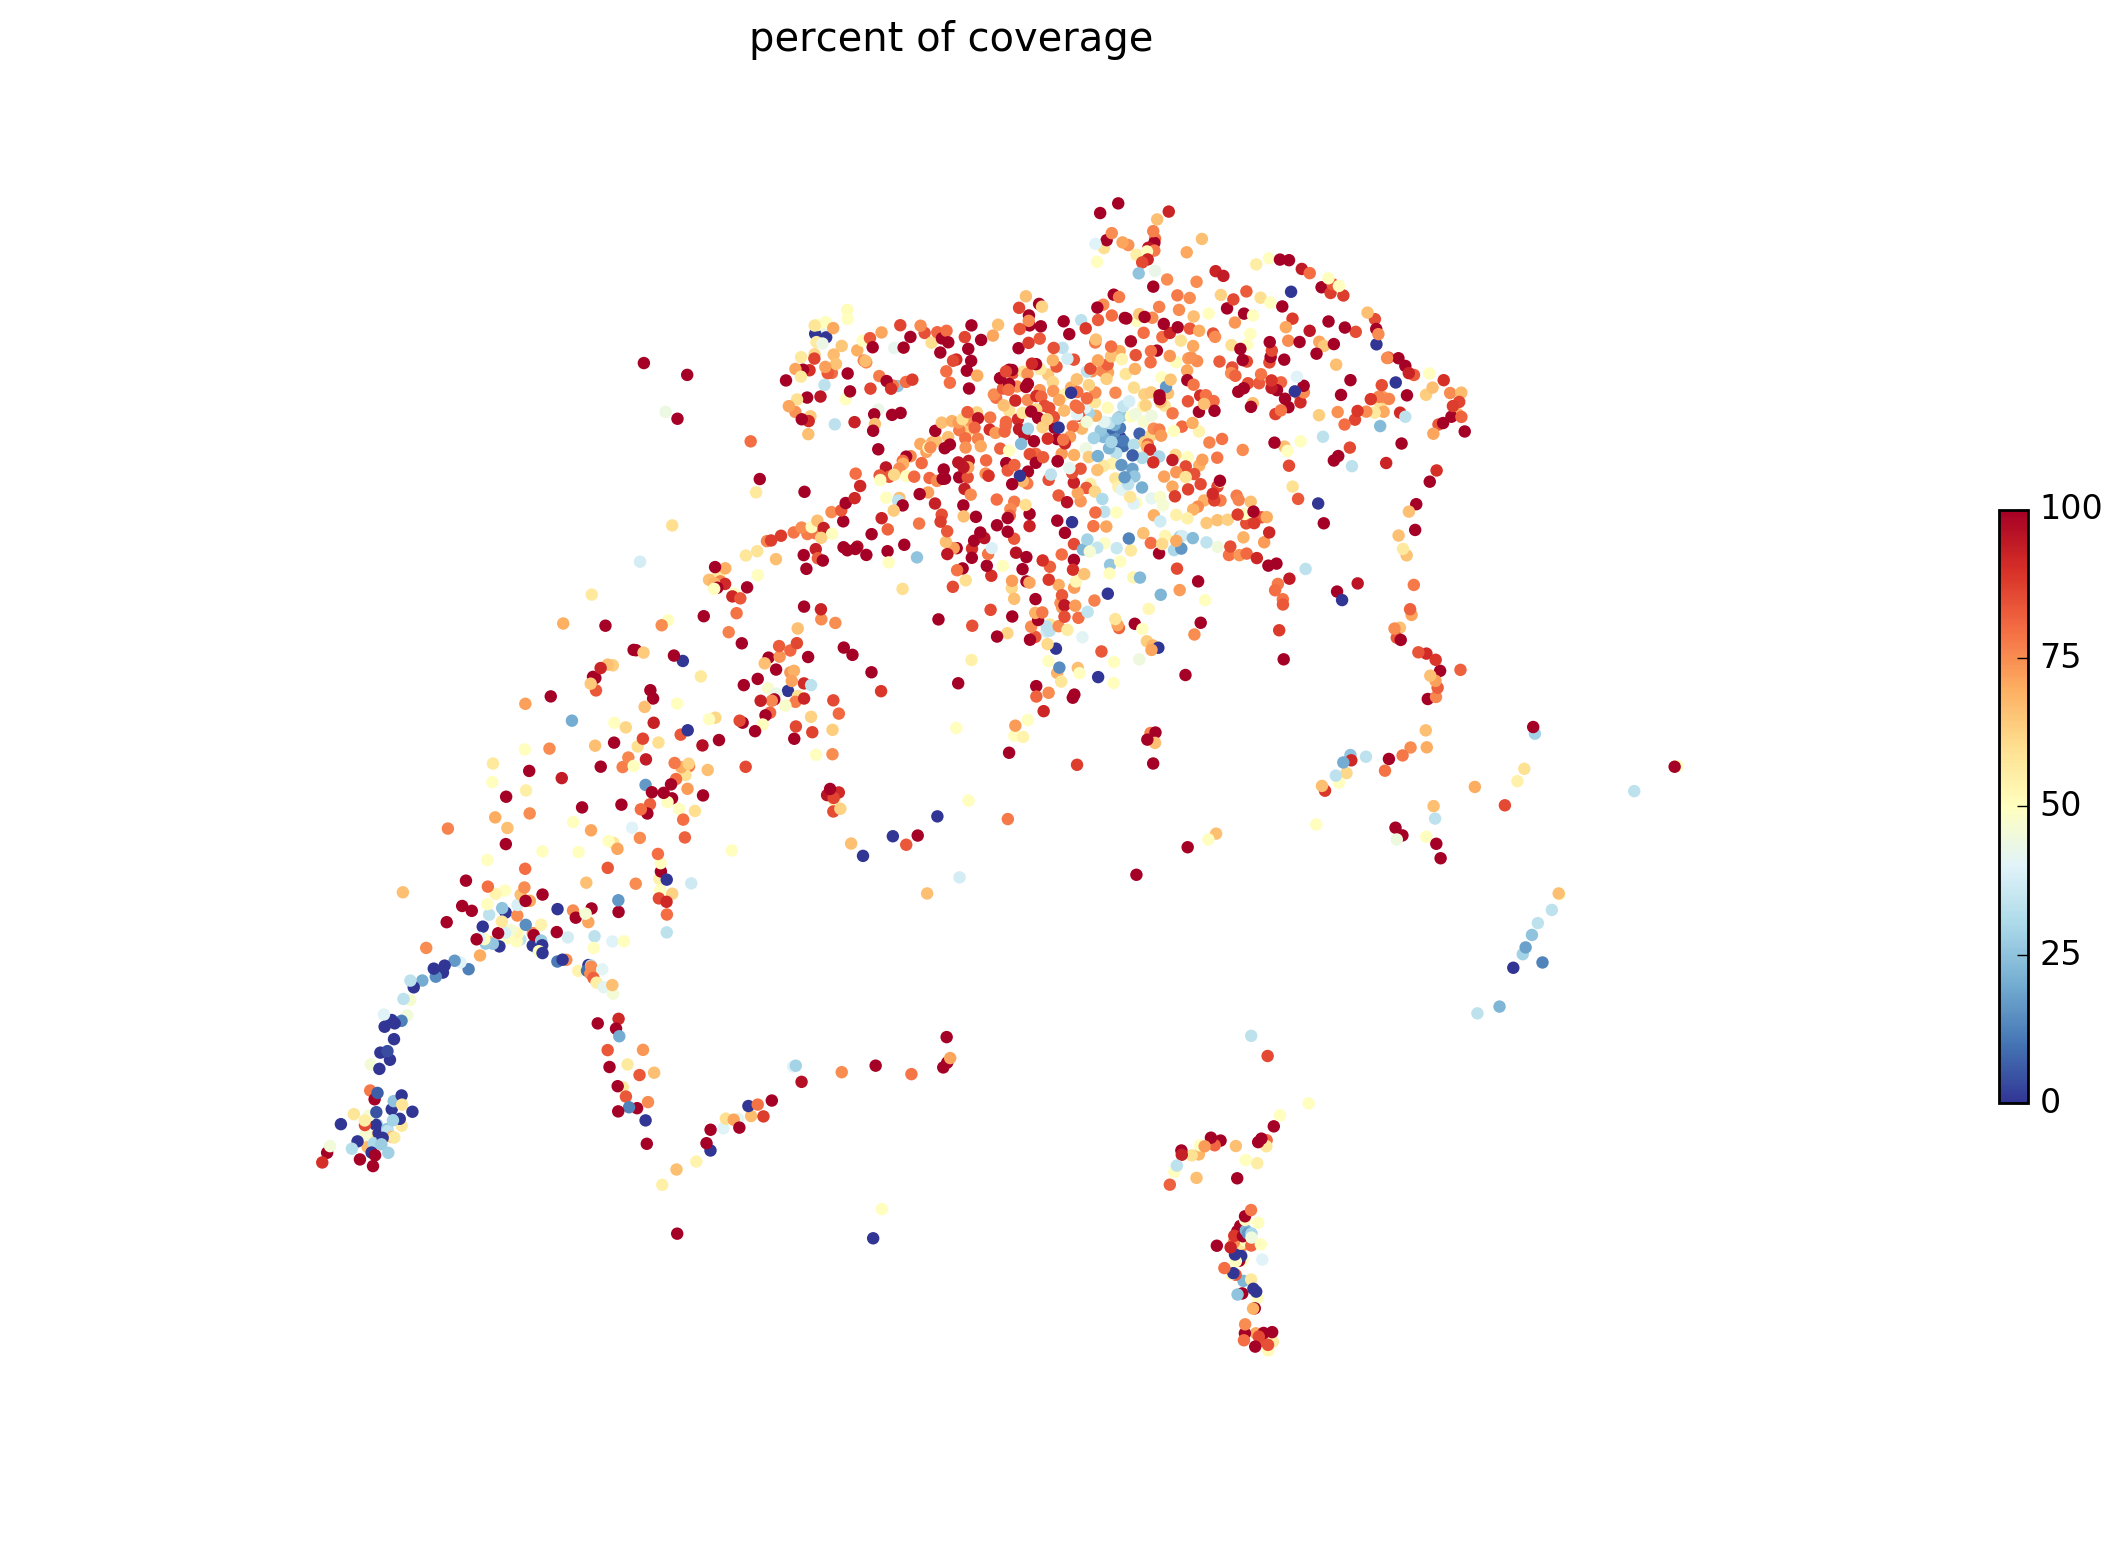

In [18]:
interact(spatial_query_supply,whattoplot=(['total_cases','percentofcoverage']),Min_Rooms=(1,6,1),Min_Size=(10,100,10),Max_Rent=(1000,5000,100));

# Automated Property Evaluation
### More of Machine Learning 

In [28]:
Mat_all = listing.copy()
listing.head()


,Rent,ZIP,Rooms,Year built,Living space,Floor,lng,lat
0,1090.0,5000.0,2.0,1983.0,42.0,1.,8.051152,47.382578
1,1923.0,1200.0,4.0,1930.0,72.0,1.,6.150230,46.213396
2,2425.0,1200.0,4.0,1983.0,76.0,1.,6.148701,46.210094
3,2480.0,1200.0,4.0,1910.0,68.0,5.,6.148480,46.210668
4,1430.0,1200.0,2.0,1945.0,32.0,3.,6.147548,46.210081


# Out of sample prediction
## Train test Split

In [29]:
sel_cols = range(1,Mat_all.shape[1])
X = Mat_all.values[:,sel_cols]
y = Mat_all.values[:,0]


import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333)

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

def my_custom_loss_func(ground_truth, predictions):
    return np.median(100*np.abs(predictions-ground_truth)/ground_truth)


n_estimators = 200
regr = DecisionTreeRegressor()
regr.fit(X_train,y_train)
preds = regr.predict(X_test)
print 'DecisionTreeRegressor', my_custom_loss_func(y_test,preds)


regr = BaggingRegressor(DecisionTreeRegressor(), n_estimators=n_estimators,n_jobs=-1)
regr.fit(X_train,y_train)
preds = regr.predict(X_test)
print 'BaggingRegressor', my_custom_loss_func(y_test,preds)


regr = RandomForestRegressor(n_estimators=n_estimators, max_depth=None,min_samples_split=2, random_state=0,n_jobs=-1)
regr.fit(X_train,y_train)
preds = regr.predict(X_test)
print 'RandomForestRegressor', my_custom_loss_func(y_test,preds)

regr = ExtraTreesRegressor(n_estimators=n_estimators, max_depth=None,min_samples_split=2, random_state=0,n_jobs=-1)
regr.fit(X_train,y_train)
preds = regr.predict(X_test)
print 'ExtraTreesRegressor', my_custom_loss_func(y_test,preds)



regr = xgb.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=n_estimators, silent=True, objective='reg:linear', nthread=-1, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, seed=0, missing=None).fit(X_train,y_train)
preds = regr.predict(X_test)
print 'XGBoost', my_custom_loss_func(y_test,preds)


degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_ = poly.fit_transform(X_train)
regr = linear_model.LinearRegression()
regr.fit(X_train_, y_train)

X_test_ = poly.fit_transform(X_test)
preds = regr.predict(X_test_)
print 'Polynomial_degree:{} with dimensions: {} '.format(degree,X_train_.shape[1]), my_custom_loss_func(y_test,preds)


degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_ = poly.fit_transform(X_train)
regr = linear_model.LinearRegression()
regr.fit(X_train_, y_train)

X_test_ = poly.fit_transform(X_test)
preds = regr.predict(X_test_)
print 'Polynomial_degree:{} with dimensions: {} '.format(degree,X_train_.shape[1]), my_custom_loss_func(y_test,preds)

degree = 4
poly = PolynomialFeatures(degree=degree)
X_train_ = poly.fit_transform(X_train)
regr = linear_model.LinearRegression()
regr.fit(X_train_, y_train)

X_test_ = poly.fit_transform(X_test)
preds = regr.predict(X_test_)
print 'Polynomial_degree:{} with dimensions: {} '.format(degree,X_train_.shape[1]), my_custom_loss_func(y_test,preds)

degree = 5
poly = PolynomialFeatures(degree=degree)
X_train_ = poly.fit_transform(X_train)
regr = linear_model.LinearRegression()
regr.fit(X_train_, y_train)

X_test_ = poly.fit_transform(X_test)
preds = regr.predict(X_test_)
print 'Polynomial_degree:{} with dimensions: {} '.format(degree,X_train_.shape[1]), my_custom_loss_func(y_test,preds)

DecisionTreeRegressor 4.52321129457
BaggingRegressor 4.2736214953
RandomForestRegressor 4.28208694203
ExtraTreesRegressor 3.8951019887
XGBoost 7.83118977952
Polynomial_degree:2 with dimensions: 36  12.0564957511
Polynomial_degree:3 with dimensions: 120  11.1831634915
Polynomial_degree:4 with dimensions: 330  10.3103958899
Polynomial_degree:5 with dimensions: 792  9.63010094713


## This method of out of sample prediction is data demanding 
## Further, it might be overfitted to test data
#### There is a better way than this...

# Cross Validation
## K-fold 

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor



from sklearn.metrics import make_scorer
def my_custom_loss_func(ground_truth, predictions):
    return np.median(-100*np.abs(predictions-ground_truth)/ground_truth)

loss = make_scorer(my_custom_loss_func, greater_is_better=False)

# loss = 'neg_median_absolute_error'
# loss = None


sel_cols = range(1,Mat_all.shape[1])
X = Mat_all.values[:,sel_cols]
y = Mat_all.values[:,0]

n_estimators = 100

regr = DecisionTreeRegressor()
scores = cross_val_score(regr, X, y,cv=3,scoring=loss)
print 'DecisionTreeRegressor',  np.median(scores)                             

regr = BaggingRegressor(DecisionTreeRegressor(), n_estimators=n_estimators,n_jobs=-1)
scores = cross_val_score(regr, X, y,cv=3,scoring=loss)
print 'BaggingRegressor', np.median(scores)  

regr = RandomForestRegressor(n_estimators=n_estimators, max_depth=None,min_samples_split=2, random_state=0,n_jobs=-1)
scores = cross_val_score(regr, X, y,cv=3,scoring=loss)
print 'RandomForestRegressor', np.median(scores)                               

regr = ExtraTreesRegressor(n_estimators=n_estimators, max_depth=None,min_samples_split=2, random_state=0,n_jobs=-1)
scores = cross_val_score(regr, X, y,cv=3,scoring=loss)
print 'ExtraTreesRegressor', np.median(scores)  




DecisionTreeRegressor 5.95544130249
BaggingRegressor 5.10758708709
RandomForestRegressor 5.09783107701
ExtraTreesRegressor 4.923125


# Grid Search with Cross Validation
## Meta-Parameter optimization

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor



from sklearn.metrics import make_scorer
def my_custom_loss_func(ground_truth, predictions):
    return np.median(-100*np.abs(predictions-ground_truth)/ground_truth)

loss = make_scorer(my_custom_loss_func, greater_is_better=False)

# loss = 'neg_median_absolute_error'
# loss = None


sel_cols = range(1,Mat_all.shape[1])
X = Mat_all.values[:,sel_cols]
y = Mat_all.values[:,0]

n_estimators = 50

# model = DecisionTreeRegressor()
# regr = GridSearchCV(model,param_grid={'min_samples_split':[2,10]},cv=3,scoring=loss)
# regr.fit(X,y)
# print 'DecisionTreeRegressor',regr.best_score_  ,regr.best_params_

# model = BaggingRegressor(DecisionTreeRegressor(), n_estimators=n_estimators,n_jobs=-1)
# regr = GridSearchCV(model,param_grid={'n_estimators':[50,100]},cv=3,scoring=loss)
# regr.fit(X,y)
# print 'BaggingRegressor', regr.best_score_  ,regr.best_params_

# model = RandomForestRegressor(n_estimators=n_estimators, max_depth=None,min_samples_split=2, random_state=0,n_jobs=-1)
# regr = GridSearchCV(model,param_grid={'n_estimators':[50,100],'min_samples_split':[2,10]},cv=3,scoring=loss)
# regr.fit(X,y)
# print 'RandomForestRegressor',  regr.best_score_  ,regr.best_params_                             

# model = ExtraTreesRegressor(n_estimators=n_estimators, max_depth=None,min_samples_split=2, random_state=0,n_jobs=-1)
# regr = GridSearchCV(model,param_grid={'n_estimators':[50,100],'min_samples_split':[2,10]},cv=3,scoring=loss)
# regr.fit(X,y)
# print 'ExtraTreesRegressor',  regr.best_score_  ,regr.best_params_


n_estimators = 2000
model = xgb.XGBRegressor(max_depth=X_train.shape[1], learning_rate=0.1, n_estimators=n_estimators, silent=True, objective='reg:linear', nthread=-1, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, seed=0, missing=None)
regr = GridSearchCV(model,param_grid={'max_depth':[3,X_train.shape[1]],'n_estimators':[1000,2000]},cv=3,scoring=loss)
regr.fit(X,y)
print 'XGBoost',  regr.best_score_  ,regr.best_params_


XGBoost 6.94599430833 {'n_estimators': 1000, 'max_depth': 3}


# Distribution of Error matters a lot!

In [42]:
sel_cols = range(1,Mat_all.shape[1])
X = Mat_all.values[:,sel_cols]
y = Mat_all.values[:,0]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

def my_custom_loss_func(ground_truth, predictions):
    return 100*(predictions-ground_truth)/ground_truth

ERRS = pd.DataFrame()

n_estimators = 200
regr = DecisionTreeRegressor()
regr.fit(X_train,y_train)
preds = regr.predict(X_test)
print 'DecisionTreeRegressor', np.median(np.abs(my_custom_loss_func(y_test,preds)))
ERRS['DecisionTreeRegressor'] = my_custom_loss_func(y_test,preds)


regr = BaggingRegressor(DecisionTreeRegressor(), n_estimators=n_estimators,n_jobs=-1)
regr.fit(X_train,y_train)
preds = regr.predict(X_test)
print 'BaggingRegressor', np.median(np.abs(my_custom_loss_func(y_test,preds)))
ERRS['BaggingRegressor'] = my_custom_loss_func(y_test,preds)

regr = RandomForestRegressor(n_estimators=n_estimators, max_depth=None,min_samples_split=2, random_state=0,n_jobs=-1)
regr.fit(X_train,y_train)
preds = regr.predict(X_test)
print 'RandomForestRegressor', np.median(np.abs(my_custom_loss_func(y_test,preds)))
ERRS['RandomForestRegressor'] = my_custom_loss_func(y_test,preds)

regr = ExtraTreesRegressor(n_estimators=n_estimators, max_depth=None,min_samples_split=2, random_state=0,n_jobs=-1)
regr.fit(X_train,y_train)
preds = regr.predict(X_test)
print 'ExtraTreesRegressor', np.median(np.abs(my_custom_loss_func(y_test,preds)))
ERRS['ExtraTreesRegressor'] = my_custom_loss_func(y_test,preds)



n_estimators = 2000
regr = xgb.XGBRegressor(max_depth=X_train.shape[1], learning_rate=0.1, n_estimators=n_estimators, silent=True, objective='reg:linear', nthread=-1, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, seed=0, missing=None)
regr.fit(X_train,y_train,)
preds = regr.predict(X_test)
print 'XGBoost', np.median(np.abs(my_custom_loss_func(y_test,preds)))
ERRS['XGBoost'] = my_custom_loss_func(y_test,preds)

degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_ = poly.fit_transform(X_train)
regr = linear_model.LinearRegression()
regr.fit(X_train_, y_train)

X_test_ = poly.fit_transform(X_test)
preds = regr.predict(X_test_)
print 'Polynomial_degree:{} with dimensions: {} '.format(degree,X_train_.shape[1]), np.median(np.abs(my_custom_loss_func(y_test,preds)))
ERRS['Polynomial_degree:{} with dimensions: {} '.format(degree,X_train_.shape[1])] = my_custom_loss_func(y_test,preds)

degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_ = poly.fit_transform(X_train)
regr = linear_model.LinearRegression()
regr.fit(X_train_, y_train)

X_test_ = poly.fit_transform(X_test)
preds = regr.predict(X_test_)
print 'Polynomial_degree:{} with dimensions: {} '.format(degree,X_train_.shape[1]),np.median(np.abs(my_custom_loss_func(y_test,preds)))
ERRS['Polynomial_degree:{} with dimensions: {} '.format(degree,X_train_.shape[1])] = my_custom_loss_func(y_test,preds)

degree = 4
poly = PolynomialFeatures(degree=degree)
X_train_ = poly.fit_transform(X_train)
regr = linear_model.LinearRegression()
regr.fit(X_train_, y_train)

X_test_ = poly.fit_transform(X_test)
preds = regr.predict(X_test_)
print 'Polynomial_degree:{} with dimensions: {} '.format(degree,X_train_.shape[1]), np.median(np.abs(my_custom_loss_func(y_test,preds)))
ERRS['Polynomial_degree:{} with dimensions: {} '.format(degree,X_train_.shape[1])] = my_custom_loss_func(y_test,preds)



DecisionTreeRegressor 4.7197640118
BaggingRegressor 4.37518983269
RandomForestRegressor 4.36536281179
ExtraTreesRegressor 3.96771929825
XGBoost 4.12200187416
Polynomial_degree:2 with dimensions: 36  11.8858901582
Polynomial_degree:3 with dimensions: 120  11.0282923547
Polynomial_degree:4 with dimensions: 330  10.2554469462


In [43]:
ERRS.head()

,DecisionTreeRegressor,BaggingRegressor,RandomForestRegressor,ExtraTreesRegressor,XGBoost,Polynomial_degree:2 with dimensions: 36,Polynomial_degree:3 with dimensions: 120,Polynomial_degree:4 with dimensions: 330
0,6.55172,7.45086,7.82931,6.55172,6.74156,7.92854,7.24409,23.0881
1,37.276,13.5364,15.0812,25.3918,18.0784,29.6592,34.0707,36.622
2,0,0,0,0,-0.106186,8.60285,-10.2302,-13.7669
3,4.83871,31.8898,33.3501,34.205,13.8054,50.051,22.4718,30.2563
4,-26.1438,21.5672,8.87081,10.402,3.3972,47.5559,55.5207,23.8037


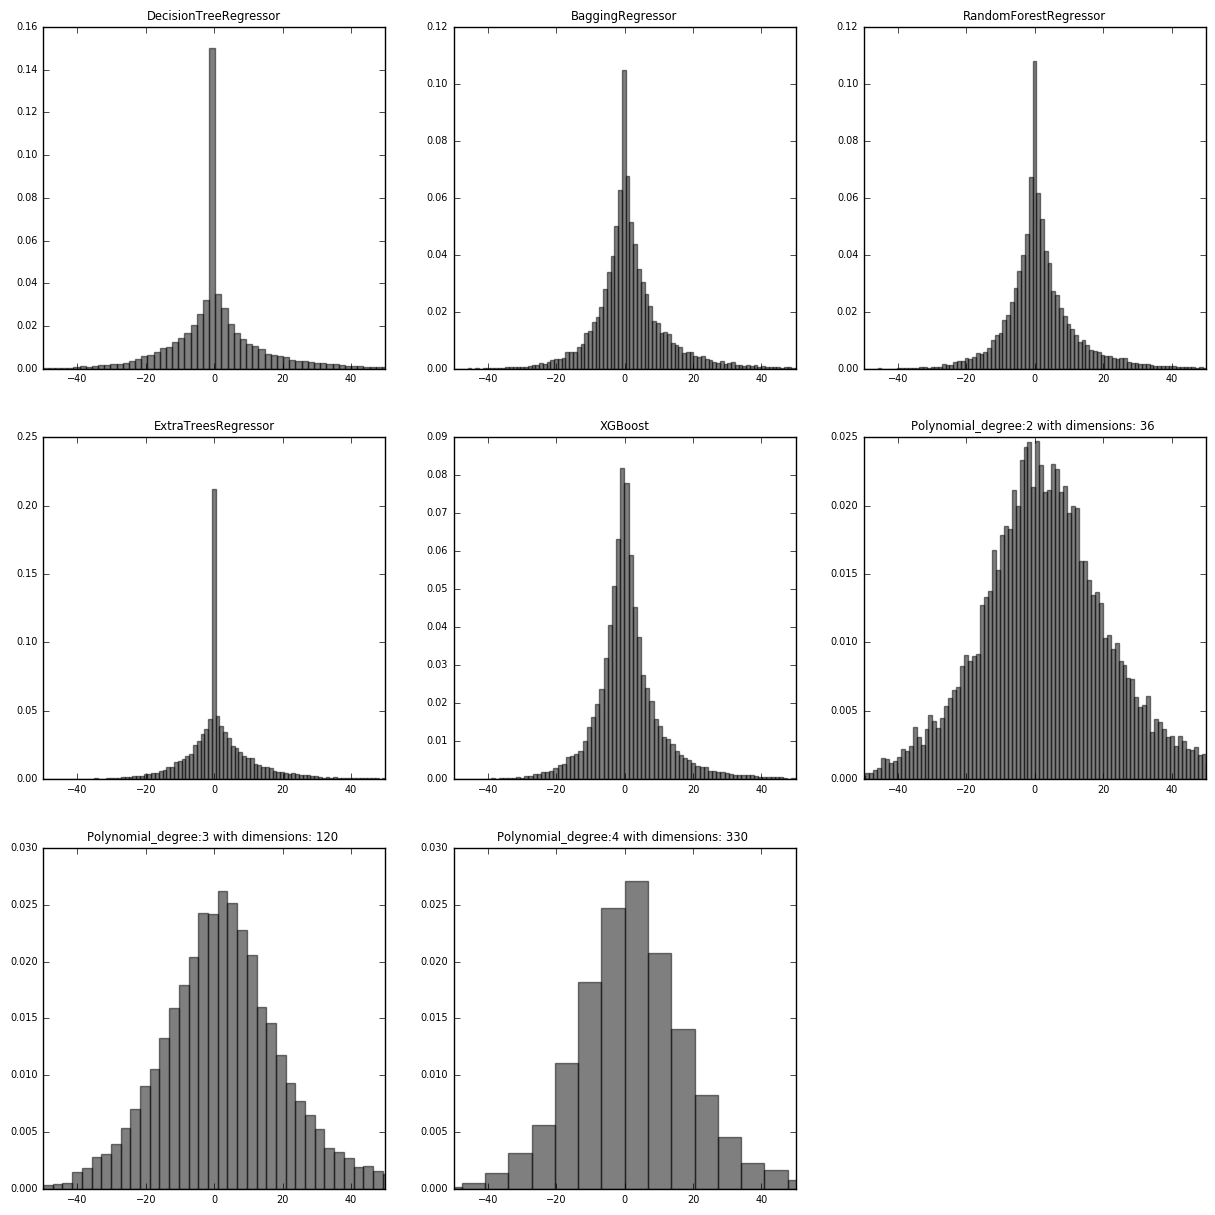

In [46]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 7}
fig = plt.figure(figsize=(15,15))
for i in range(ERRS.shape[1]):
    plt.subplot(3,3,i+1)
    plt.hist(ERRS.values[:,i],bins=500,normed=True,color='black',alpha=.5)
    plt.title(ERRS.columns[i])
    plt.rc('font', **font)
    plt.xlim(-50,50)

## Looking at the error distribution more quantitatively 

In [45]:
quality = [1,5,10,15,20]
percentiles = pd.DataFrame(data= np.zeros((len(quality),ERRS.shape[1])),index=quality,columns=ERRS.columns)
for percent in quality:
    for m in range(ERRS.shape[1]):
        a = np.abs(ERRS.values[:,m])
        n = float(a.shape[0])
        percentiles.ix[percent,m]= 100*a[a<=percent].shape[0]/n
percentiles
med_error = pd.DataFrame(data=np.median(np.abs(ERRS.values[:]),axis=0)[np.newaxis,:],columns=ERRS.columns,index=['median'])
med_error
percentiles = pd.concat((med_error,percentiles))
percentiles.T

,median,1,5,10,15,20
DecisionTreeRegressor,4.71976,27.9116,51.2582,67.8928,78.7512,85.8571
BaggingRegressor,4.37519,18.0726,54.3261,75.7128,86.2412,91.8206
RandomForestRegressor,4.36536,18.0824,54.1981,75.8359,86.2904,91.7959
ExtraTreesRegressor,3.96772,27.7589,55.8773,75.1957,85.8325,91.5152
XGBoost,4.122,16.2752,56.3353,78.1849,88.3094,93.5047
Polynomial_degree:2 with dimensions: 36,11.8859,4.52061,22.7803,43.4136,59.8316,71.4532
Polynomial_degree:3 with dimensions: 120,11.0283,4.73728,24.5088,46.0728,62.8798,74.7476
Polynomial_degree:4 with dimensions: 330,10.2554,5.47594,26.8725,48.8551,66.2038,78.0421


# Other possible use cases
* ** Spatial Price Sensitivity Analysis for developers and constructors**
* **Trend analysis and forecasting for banks**
* ** Estimating the dynamics of different region**
* **Personalized real estate search for end users**
* ** Many other use cases for other stakeholders: Banks, Real Estate Agents, Mortgage lenders, Movers,...**

* ** Further: Using Machine Learning for Data Collection**
    * Logging users interaction
    * Receiving the feedbacks from users

## Deploying the trained model on a web application

* **We need to serve the trained model like an API.** 

In [107]:
# from sklearn.externals import joblib

# # Dump the trained model
# joblib.dump(regr, 'model.pkl')

# # Load it like this on the server
# regr = joblib.load('model.pkl')

* **To do so, we need a "Web Framework"** 
    * <a href=http://flask.pocoo.org/> Flask is a nice, minimal and easy one!</a>
* **Further, we need a host and server which works with Flask.**
    * <a href=https://www.pythonanywhere.com/> https://www.pythonanywhere.com/</a>

<a style="color:red;font-size: 3em;" href=http://www.keylead.ch/> I put them together here in a complete web application!</a>